In [1]:
import scanpy as sc
import scTenifoldXct as st
from scTenifoldXct.visualization import get_Xct_pairs, plot_XNet

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load scRNA-seq data
adata = sc.read_h5ad('data/adata_short_example.h5ad')
adata

AnnData object with n_obs × n_vars = 202 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'ident'
    layers: 'log1p', 'raw'

In [3]:
# build a scTenifoldXct object, including GRNs
xct = st.scTenifoldXct(data = adata, 
                        source_celltype = 'Inflam. FIB',
                        target_celltype = 'Inflam. DC',
                        obs_label = 'ident',
                        rebuild_GRN = True, # timer
                        GRN_file_dir = 'Net_example_ray',  
                        verbose = True,
                        n_cpus = 8)

(cell, feature): (121, 3000)
(cell, feature): (81, 3000)
selected 107 LR pairs
building GRN of Inflam. FIB...
ray init, using 8 CPUs
execution time of making pcNet: 102.90 s
building GRN of Inflam. DC...
ray init, using 8 CPUs
execution time of making pcNet: 61.72 s
building correspondence...
concatenating GRNs...
scTenifoldXct init completed


In [ ]:
# # show model architecture
# xct.trainer.arch()

In [ ]:
# # load model if trained
# xct.nn_trainer.load_model_states('model_short_example')

In [4]:
# get embeddings
emb = xct.get_embeds(train = True)
emb.shape

training...: 100%|██████████████████████████████| 1000/1000 [03:04<00:00,  5.43it/s]


computing pair-wise euclidean distances...


(6000, 3)

In [ ]:
# # save model
# xct_obj.nn_trainer.save_model_states('model_short_example')

In [ ]:
# # show loss
# xct.plot_losses()

In [5]:
# get significant L-R pairs
xct_pairs = xct.null_test()
xct_pairs


Total enriched: 23 / 9000000


,ligand,receptor,dist,correspondence,p_val,enriched_rank
CCL2_CCR7,CCL2,CCR7,0.001773,338.488098,0.002368,1
CXCL14_CXCR4,CXCL14,CXCR4,0.002013,348.568604,0.003203,2
CCL2_CXCR4,CCL2,CXCR4,0.002129,239.117050,0.003637,3
CXCL14_CCR7,CXCL14,CCR7,0.002451,493.424927,0.004892,4
VCAM1_ITGB2,VCAM1,ITGB2,0.002518,68.917603,0.005154,5
CCL19_CXCR4,CCL19,CXCR4,0.003002,423.317902,0.007180,6
CCL19_CCR7,CCL19,CCR7,0.003009,599.238159,0.007207,7
CXCL12_CCR7,CXCL12,CCR7,0.003013,303.637329,0.007221,8
CXCL12_CXCR4,CXCL12,CXCR4,0.003283,214.497559,0.008278,9
CCL26_CCR7,CCL26,CCR7,0.003629,56.201866,0.009631,10


In [6]:
# visualize the pairs
targets = get_Xct_pairs(xct_pairs)
targets[:5]

(['CCL2', 'CCR7'],
 ['CXCL14', 'CXCR4'],
 ['CCL2', 'CXCR4'],
 ['CXCL14', 'CCR7'],
 ['VCAM1', 'ITGB2'])

loading GRN None...
undirected graph constructed: 
# of nodes: 21, # of edges: 20

loading GRN None...
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from CCL2 to CCR7 added


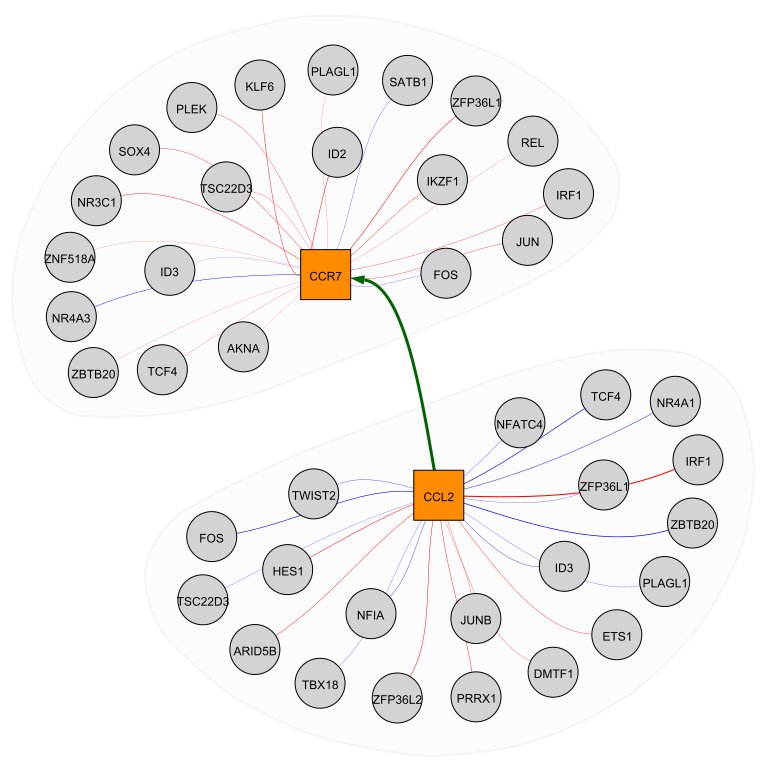

In [7]:
i = 0
s = xct.plot_pcNet_graph(view='sender', gene_names=[targets[i][0]],
                             top_edges=20, show = False, verbose = True)
t = xct.plot_pcNet_graph(view='receiver', gene_names=[targets[i][1]], 
                             top_edges=20, show = False, verbose = True)

plot_XNet(s, t, gene_pairs = [targets[i]], df_enriched = xct_pairs, show = True, verbose = True)